In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [376]:
dataHP = pd.read_csv('train_HP.csv')
dataHP.shape 

(1460, 81)

### Extraemos columnas con Nan  

In [377]:
#A estas columnas tenemos que hacerle algún tipo de imputación
cols_con_na = [col for col in dataHP.columns if(dataHP[col].isnull().mean()>0)]
cols_con_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [378]:
# necesitamos conocer el tipo de datos de cada columna
# si son numeros, la imputacion se hace de una forma y si son string se hace de otra forma
dataHP[cols_con_na].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [379]:
#Buscamos el porcentaje de NaN que tienen cada columna
#Un 5% es el maximo para hacer imputacion, mas de eso no vale la pena.
prop_nan_per_col = dataHP[cols_con_na].isnull().mean()*100
prop_nan_per_col
#De estas columnas, hay 6 que no cumplen con el 5% maximo, hay 5 que se pasan solo un poco por lo que las tomaremos como dentro del maximo.

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

### Casos especiales

In [380]:
# LotFrontage es del tipo numerico y tiene menos del 20% de nulos, procederemos a hacer la imputacion y verificar si puede quedarse.
dataHP['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [381]:
media = dataHP['LotFrontage'].mean()
mediana = dataHP['LotFrontage'].median()

print(f"Media: {media}")
print(f"Mediana: {mediana}")

Media: 70.04995836802665
Mediana: 69.0


In [382]:
dataHP['Front_mean']=np.round(dataHP['LotFrontage'].fillna(media))
dataHP['Front_median']=np.round(dataHP['LotFrontage'].fillna(mediana))

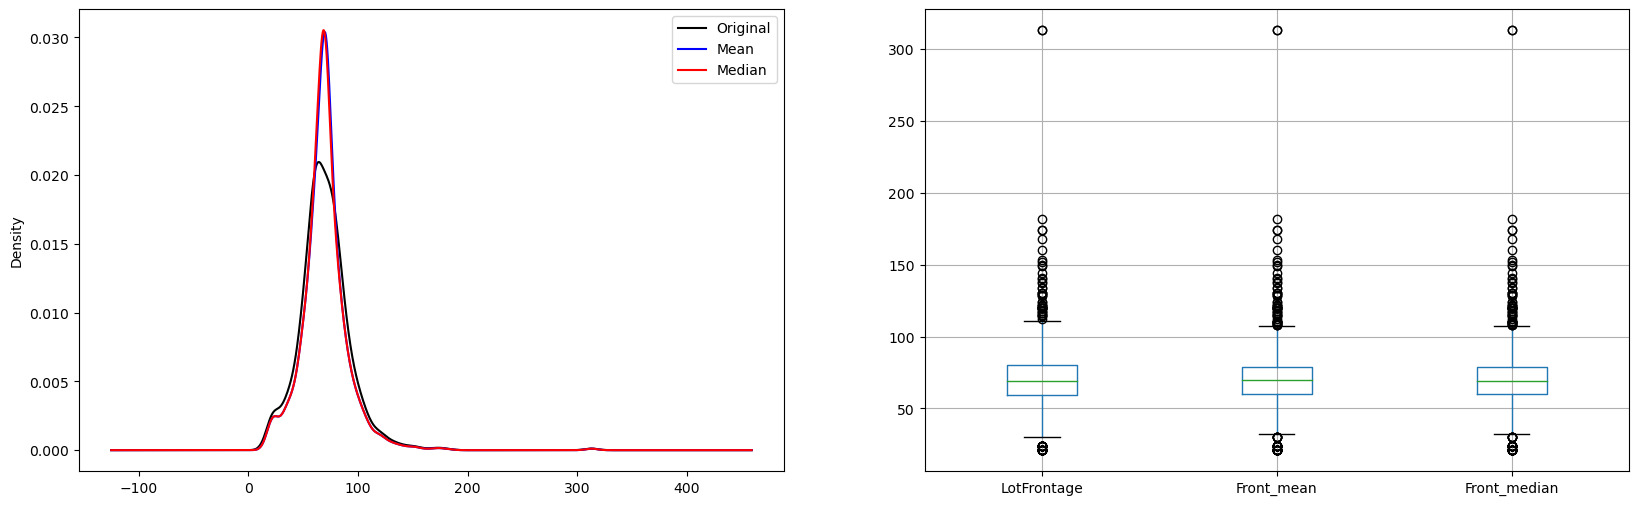

In [383]:
fig = plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
dataHP['LotFrontage'].plot.density(color='black', label='Original')
dataHP['Front_mean'].plot.density(color='blue', label='Mean')
dataHP['Front_median'].plot.density(color='red', label='Median')
plt.legend()

plt.subplot(1,2,2)
dataHP[['LotFrontage','Front_mean','Front_median']].boxplot()
plt.show()

#Observamos que se conserva la tendencia y las boxplot son muy similares, procedemos a rellenar los NaN con la media en LotFrontage

In [384]:
dataHP=dataHP.drop(columns=['Front_mean','Front_median'])
dataHP['LotFrontage'].fillna(media,inplace=True)

In [385]:
cols_con_na = [col for col in dataHP.columns if(dataHP[col].isnull().mean()>0)]
prop_nan_per_col = dataHP[cols_con_na].isnull().mean()*100
prop_nan_per_col


Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [386]:
#Otro caso especial es PoolQC
print(dataHP['PoolQC'].value_counts())

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64


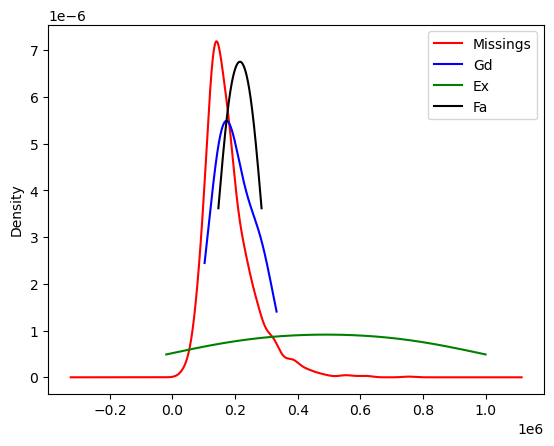

In [387]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataHP[dataHP['PoolQC'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataHP[dataHP['PoolQC'] == 'Gd']['SalePrice'].plot(kind="kde", color="blue", label="Gd")
dataHP[dataHP['PoolQC'] == 'Ex']['SalePrice'].plot(kind="kde", color="green", label="Ex")
dataHP[dataHP['PoolQC'] == 'Fa']['SalePrice'].plot(kind="kde", color="black", label="Fa")
ax.legend()
plt.show()

In [388]:
dataHP.loc[:,['PoolQC','SalePrice']].nlargest(20,'SalePrice')
#La intencion inicial era reemplazar todos los NaN con una nueva catergia de "NO" para evitar la eliminacion de la columna
#Observamos que no hay relacion directa de la piscina con SalePrice, y hay muy pocos datos, por lo que se elimina la columna.
#De las 20 casas mas caras, solo una tiene piscina. Yo hubiera esperado que las mas caras tuvieran piscina.

,PoolQC,SalePrice
691,NaN,755000
1182,Ex,745000
1169,NaN,625000
898,NaN,611657
803,NaN,582933
1046,NaN,556581
440,NaN,555000
769,NaN,538000
178,NaN,501837
798,NaN,485000


In [389]:
cols_rescatables = [col for col in dataHP.columns 
                        if( (dataHP[col].isnull().mean()<=0.056))]
cols_rescatables

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3Ssn

In [390]:
cols_norescatables = [col for col in dataHP.columns 
                        if( (dataHP[col].isnull().mean()>0.056))]
cols_norescatables

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [391]:
#Verificamos la forma que tomaria el dataset
dataHP[cols_rescatables].shape,dataHP.shape


((1460, 76), (1460, 81))

In [392]:
#Realizamos eliminacion de columnas con mayor a 5% de datos faltantes
dataHP=dataHP.drop(columns=cols_norescatables)
dataHP.shape

(1460, 76)

### Imputacion variables numericas

In [393]:
#Encontramos las columnas que cumplen con el limite de 5% NaNs

cols_rescatables_num = [col for col in dataHP.columns 
                        if((dataHP[col].isnull().mean()>0) and 
                           (dataHP[col].isnull().mean()<=0.056)and
                           (dataHP[col].dtypes=='float64'))]
cols_rescatables_num

['MasVnrArea', 'GarageYrBlt']

In [394]:
#Realizamos la imputacion de la misma manera que lo hicimos con LotFrontage reemplazando con la media

-----------MasVnrArea---------
Media: 103.68526170798899
Mediana: 0.0


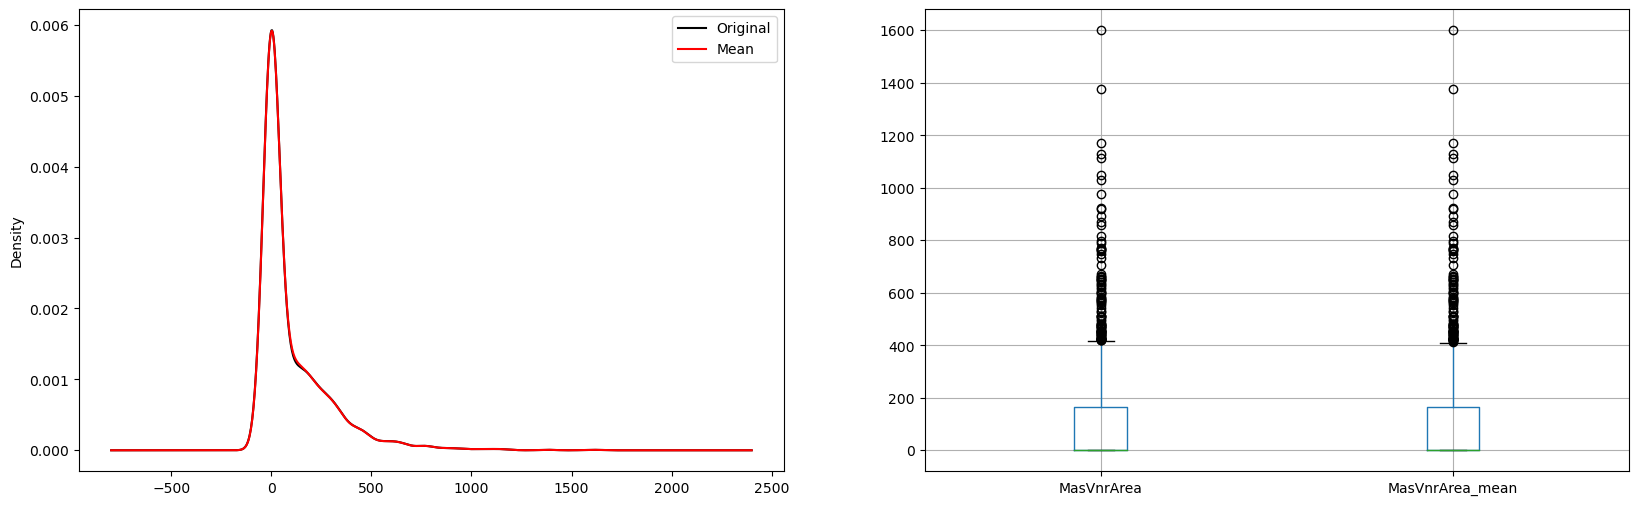

-----------GarageYrBlt---------
Media: 1978.5061638868744
Mediana: 1980.0


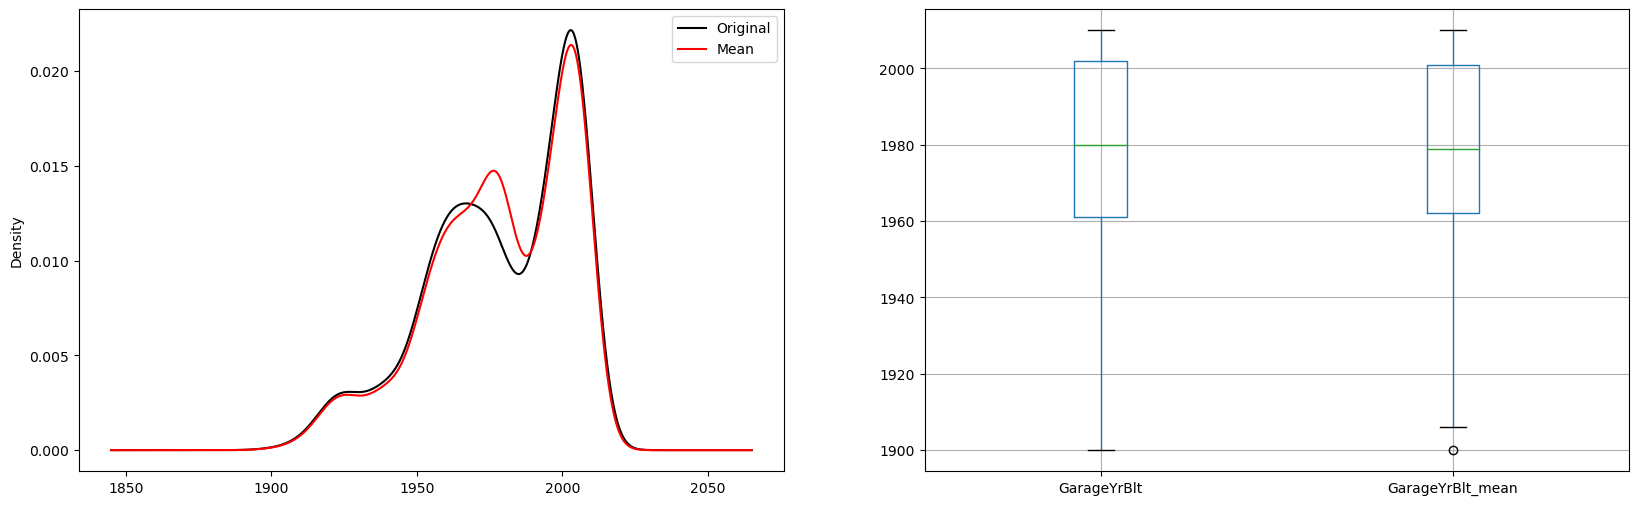

In [395]:
for col in cols_rescatables_num:
    media = dataHP[col].mean()
    mediana = dataHP[col].median()

    print(f'-----------{col}---------')
    print(f"Media: {media}")
    print(f"Mediana: {mediana}")

    col_name= f'{col}_mean'

    dataHP[col_name]=np.round(dataHP[col].fillna(media))

    fig = plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    dataHP[col].plot.density(color='black', label='Original')
    dataHP[col_name].plot.density(color='red', label='Mean')
    plt.legend()

    plt.subplot(1,2,2)
    dataHP[[col,col_name]].boxplot()
    plt.show()

    dataHP=dataHP.drop(columns=[col_name])
    dataHP[col].fillna(media,inplace=True)


In [404]:
print(dataHP.shape)
print(dataHP[cols_rescatables_num].isnull().mean())

(1460, 76)
MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64


### Imputacion variables categoricas

In [397]:
cols_rescatables_cat = [col for col in dataHP.columns 
                        if((dataHP[col].isnull().mean()>0) and 
                           (dataHP[col].isnull().mean()<=0.056)and
                           (dataHP[col].dtypes=='object'))]
cols_rescatables_cat

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [405]:
for col in cols_rescatables_cat:
     print(f'----{col}---- \n {dataHP[col].value_counts()}')

----MasVnrType---- 
 None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
----BsmtQual---- 
 TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
----BsmtCond---- 
 TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
----BsmtExposure---- 
 No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
----BsmtFinType1---- 
 Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
----BsmtFinType2---- 
 Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
----Electrical---- 
 SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
----GarageType---- 
 Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
----GarageFinish---- 
 Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
----Garag

In [407]:
print(dataHP['MasVnrType'].value_counts()['BrkFace'])

445


In [416]:
for val in dataHP['MasVnrType'].unique():
    count = (dataHP['MasVnrType']==val).sum()
    print(val,count)

BrkFace 445
None 864
Stone 128
BrkCmn 15
nan 0


array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [399]:
dataHP[cols_rescatables_cat].isnull().mean()*100

MasVnrType      0.547945
BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
Electrical      0.068493
GarageType      5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64

----MasVnrType---- 
 None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
----BsmtQual---- 
 TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
----BsmtCond---- 
 TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
----BsmtExposure---- 
 No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
----BsmtFinType1---- 
 Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
----BsmtFinType2---- 
 Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
----Electrical---- 
 SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
----GarageType---- 
 Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
----GarageFinish---- 
 Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
----Garag

In [406]:
dataHP['PoolQC'].value_counts()

KeyError: 'PoolQC'

#### Complete Case Analysis (CCA)

In [ ]:
#columnas que no tienen ningun NaN

data_HP_noNAN = dataHP.dropna()
dataHP.shape, data_HP_noNAN.shape

#se elimino todo

((0, 5), (0, 5))

In [ ]:
#Dejamos las columnas que solo tienen casos completos, es decir que no tienen ningun nulo
cols_rescatables = [col for col in dataHP.columns if(dataHP[col].isnull().mean()<=0.2)]

data_HP_noNAN = dataHP[cols_rescatables].dropna(axis='index')
dataHP.shape, data_HP_noNAN.shape

((0, 5), (0, 0))

In [ ]:
dataHP['LotFrontage'].hist(bins=50, density=True, color='red', alpha = 0.5)
data_HP_noNAN['LotFrontage'].hist(bins=50, density=True, color='black', alpha = 0.5)
dataHP['Front_mean'].hist(bins=50, density=True, color='green', alpha = 0.5)
plt.show()

KeyError: 'LotFrontage'

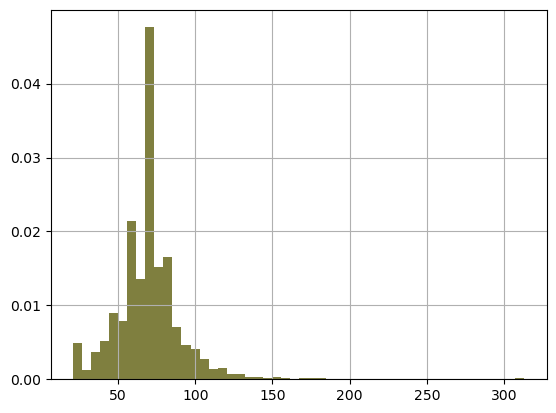

In [ ]:
dataHP['LotFrontage'].hist(bins=50, density=True, color='red', alpha = 0.5)
dataHP['Front_mean'].hist(bins=50, density=True, color='green', alpha = 0.5)
plt.show()

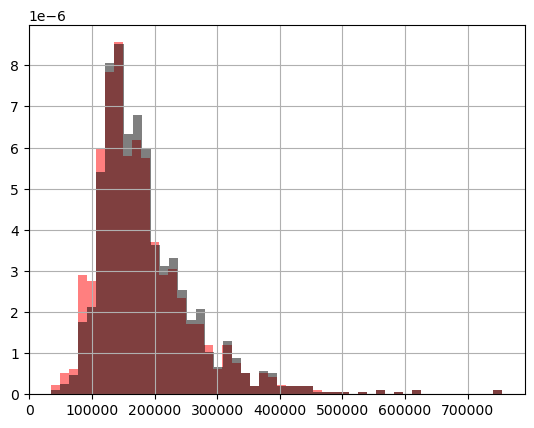

In [ ]:
dataHP['SalePrice'].hist(bins=50, density=True, color='red', alpha = 0.5)
data_HP_noNAN['SalePrice'].hist(bins=50, density=True, color='black', alpha = 0.5)
plt.show()

## Imputacion Media y mediana

In [ ]:
dataTitanic = pd.read_csv('titanic_s1.csv')
dataTitanic = dataTitanic[['Survived','Age','Fare']]
dataTitanic.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
dataTitanic.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
media = dataHP['LotFrontage'].mean()
mediana = dataHP['LotFrontage'].median()

print(f"Media: {media}")
print(f"Mediana: {mediana}")

Media: 70.04995836802642
Mediana: 70.04995836802665


In [ ]:
dataHP['Front_mean']=np.round(dataHP['LotFrontage'].fillna(media))
dataHP['Front_median']=np.round(dataHP['LotFrontage'].fillna(mediana))

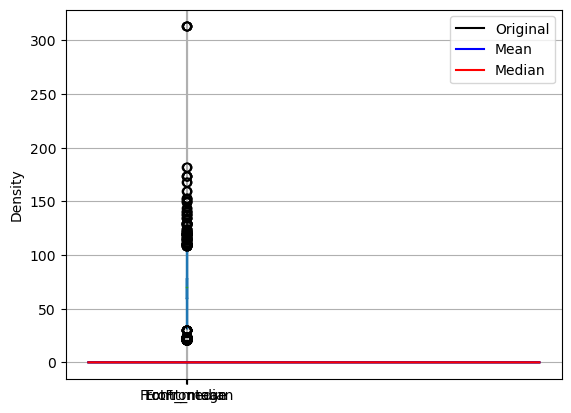

In [ ]:
dataHP['Front_mean']=np.round(dataHP['LotFrontage'].fillna(media))
dataHP['Front_median']=np.round(dataHP['LotFrontage'].fillna(mediana))

fig = plt.figure()
ax = fig.add_subplot(111)

dataHP['LotFrontage'].plot.density(color='black', label='Original')
dataHP['Front_mean'].plot.density(color='blue', label='Mean')
dataHP['Front_median'].plot.density(color='red', label='Median')
dataHP[['LotFrontage','Front_mean','Front_median']].boxplot()
ax.legend()
plt.show()

<AxesSubplot:>

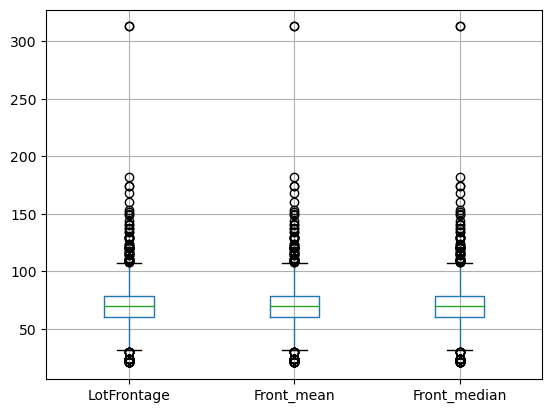

In [ ]:
dataHP[['LotFrontage','Front_mean','Front_median']].boxplot()

## Empieza Clase semana 2

## Imputaciones

### Imputacion categorica

In [ ]:
dataset_cat_missing = dataHP[['BsmtQual','FireplaceQu','SalePrice']]
dataset_cat_missing.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [ ]:
dataset_cat_missing.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [ ]:
dataset_cat_missing['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [ ]:
dataset_cat_missing['BsmtQual'].value_counts()/len(dataset_cat_missing)

TA    0.444521
Gd    0.423288
Ex    0.082877
Fa    0.023973
Name: BsmtQual, dtype: float64

C:\Users\pablo\AppData\Local\Temp\ipykernel_15748\1929464232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cat_missing['BsmtQual'].fillna('Miss',inplace=True)


<AxesSubplot:>

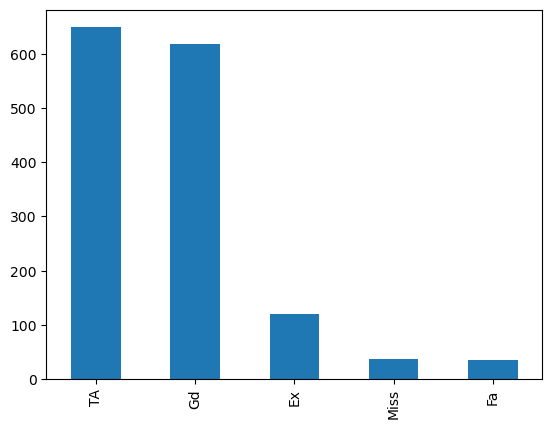

In [ ]:
dataset_cat_missing['BsmtQual'].fillna('Miss',inplace=True)
dataset_cat_missing['BsmtQual'].value_counts().plot.bar()

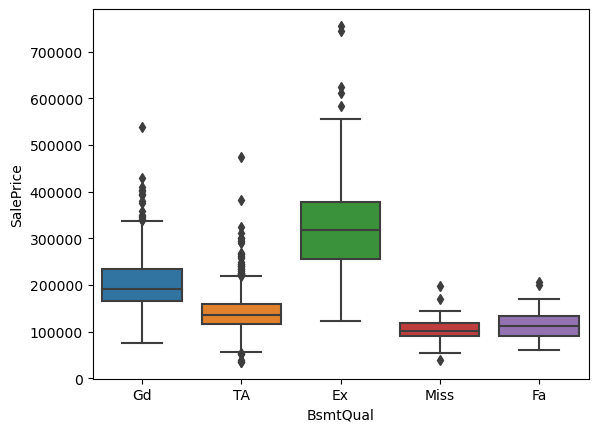

In [ ]:
import seaborn as sns
sns.boxplot(x=dataset_cat_missing['BsmtQual'],y=dataset_cat_missing['SalePrice'])
plt.show()

ValueError: zero-size array to reduction operation fmax which has no identity

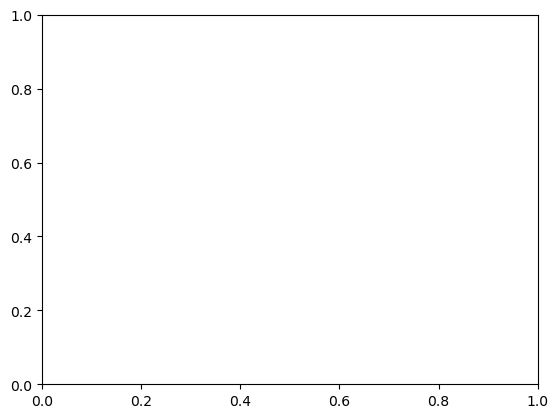

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['BsmtQual'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'TA']['SalePrice'].plot(kind="kde", color="blue", label="TA")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'Gd']['SalePrice'].plot(kind="kde", color="green", label="Gd")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'Fa']['SalePrice'].plot(kind="kde", color="black", label="Fa")
ax.legend()
plt.show()

In [ ]:
#hay algo raro que se ven valores negativos 
#es por el tipo de grafica, kde, kernel density estimation
#eso es normal por el tipo de valores que se usa para graficar

In [ ]:
#imputacion de variable categorica
dataset_cat_missing['BsmtQual'].fillna('Fa',inplace=True)

C:\Users\pablo\AppData\Local\Temp\ipykernel_20612\1706462357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cat_missing['BsmtQual'].fillna('Fa',inplace=True)


In [ ]:
dataset_cat_missing['FireplaceQu'].value_counts()/len(dataset_cat_missing)

Gd    0.260274
TA    0.214384
Fa    0.022603
Ex    0.016438
Po    0.013699
Name: FireplaceQu, dtype: float64

In [ ]:
dataset_cat_missing['FireplaceQu'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("FireplaceQu")
plt.show()

NameError: name 'dataset_cat_missing' is not defined

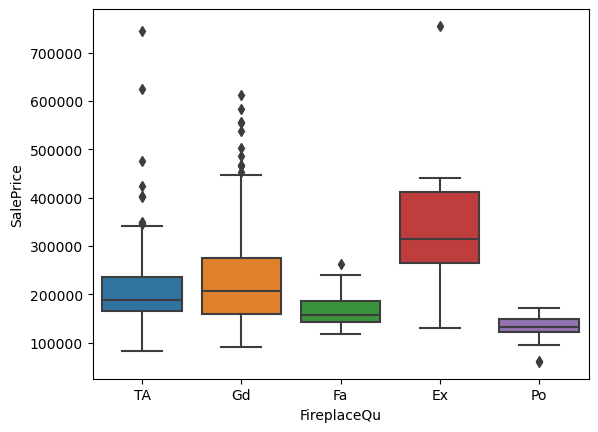

In [ ]:
sns.boxplot(x=dataset_cat_missing['FireplaceQu'],y=dataset_cat_missing['SalePrice'])
plt.show()

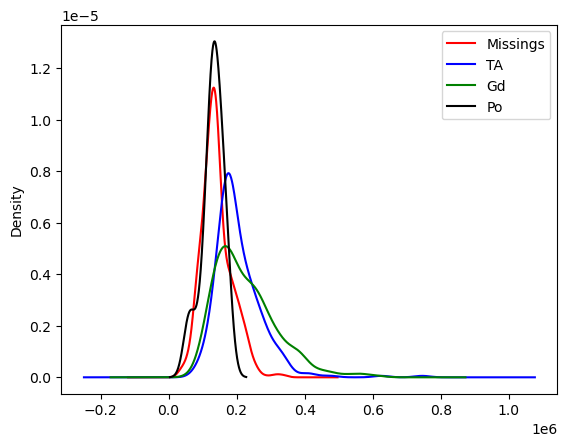

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['FireplaceQu'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['FireplaceQu'] == 'TA']['SalePrice'].plot(kind="kde", color="blue", label="TA")
dataset_cat_missing[dataset_cat_missing['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind="kde", color="green", label="Gd")
dataset_cat_missing[dataset_cat_missing['FireplaceQu'] == 'Po']['SalePrice'].plot(kind="kde", color="black", label="Po")
ax.legend()
plt.show()

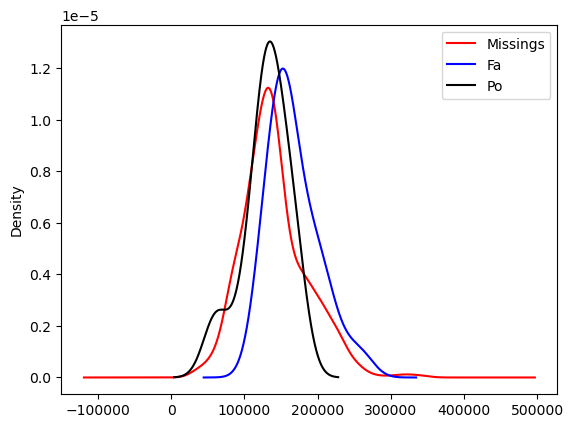

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['FireplaceQu'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['FireplaceQu'] == 'Fa']['SalePrice'].plot(kind="kde", color="blue", label="Fa")
dataset_cat_missing[dataset_cat_missing['FireplaceQu'] == 'Po']['SalePrice'].plot(kind="kde", color="black", label="Po")
ax.legend()
plt.show()

In [ ]:
#Aqui se puede decidir entre uno y otro, son muy parecidos

In [ ]:
#imputacion de variable categorica
dataset_cat_missing['FireplaceQu'].fillna('Fa',inplace=True)

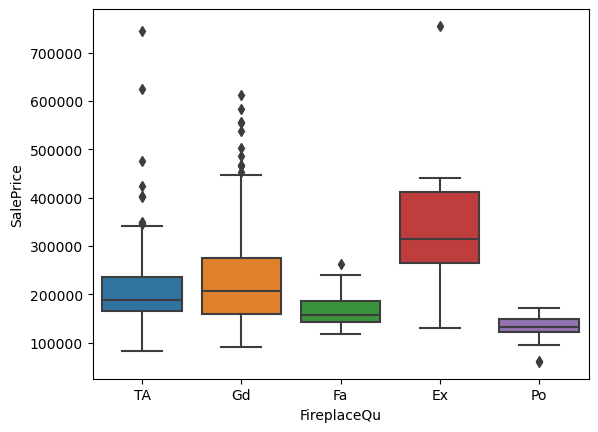

In [ ]:
sns.boxplot(x=dataset_cat_missing['FireplaceQu'],y=dataset_cat_missing['SalePrice'])
plt.show()

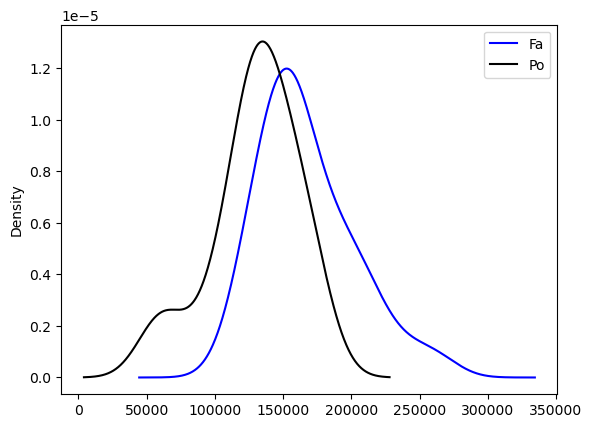

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)


dataset_cat_missing[dataset_cat_missing['FireplaceQu'] == 'Fa']['SalePrice'].plot(kind="kde", color="blue", label="Fa")
dataset_cat_missing[dataset_cat_missing['FireplaceQu'] == 'Po']['SalePrice'].plot(kind="kde", color="black", label="Po")
ax.legend()
plt.show()

In [ ]:
#si inicialmente la grafica no es normal, entonces no es buena idea hacer la imputacion de esa manera

## Codificacion de Variables Categoricas, segundo paso 

In [ ]:
def getCategoryVars(dataset):
    cat_colnames = []
    colnames = dataset.columns
    for col in colnames:
        if(dataset[col].dtype=='object'):
            cat_colnames.append(col)
    return cat_colnames

#se creo una variable vacia, se buscto uno por uno el tipo de variable de cada columna y si es objeto o sea categorica entonces
#se almancena en la variable 

In [ ]:
cat_cols=getCategoryVars(dataHP)
cat_cols

In [ ]:
cat_cols.append('SalePrice')

In [ ]:
dataset_categories = dataHP[cat_cols]
dataset_categories.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000


In [ ]:
dataset_categories['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [ ]:
#es buena cantidata porque tiene pocas columnas
pd.get_dummies(dataset_categories['MSZoning'])

,C (all),FV,RH,RL,RM
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
1455,0,0,0,1,0
1456,0,0,0,1,0
1457,0,0,0,1,0
1458,0,0,0,1,0


In [ ]:
dataset_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [ ]:
dfTemp=pd.get_dummies(dataset_categories)
dfTemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 253 entries, SalePrice to SaleCondition_Partial
dtypes: int64(1), uint8(252)
memory usage: 370.8 KB


In [ ]:
#Tiene menos memoria pero eso no lo hace mas facil de procesar ya que tiene mas de 5 veces el numero de columnas.


### Frecuency encoding

In [ ]:
dataset_categories['KitchenQual'].value_counts().sort_values(ascending=False)

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

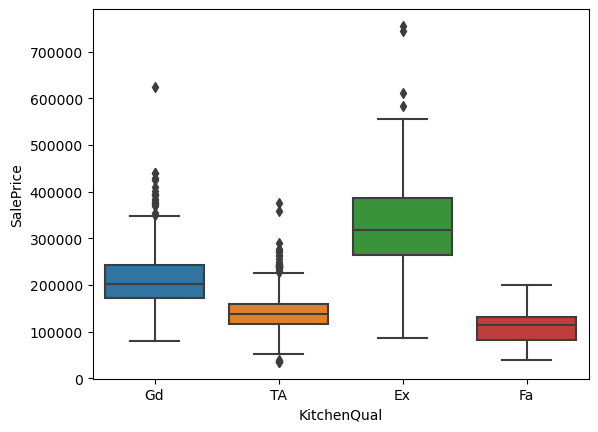

In [ ]:
sns.boxplot(x=dataset_categories['KitchenQual'],y=dataset_categories['SalePrice'])
plt.show()

In [ ]:
kitchen_Qual_freq_mapper = (dataset_categories['KitchenQual'].value_counts().sort_values(ascending=False)).to_dict()
kitchen_Qual_freq_mapper

{'TA': 735, 'Gd': 586, 'Ex': 100, 'Fa': 39}

In [ ]:
dataset_categories['KitchenQual_code']=dataset_categories['KitchenQual'].map(kitchen_Qual_freq_mapper)
dataset_categories[['KitchenQual_code','KitchenQual']]

C:\Users\pablo\AppData\Local\Temp\ipykernel_20612\3955305675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['KitchenQual_code']=dataset_categories['KitchenQual'].map(kitchen_Qual_freq_mapper)


,KitchenQual_code,KitchenQual
0,586,Gd
1,735,TA
2,586,Gd
3,586,Gd
4,586,Gd
...,...,...
1455,735,TA
1456,735,TA
1457,586,Gd
1458,586,Gd
